# Gradient Descent

This notebook is based on [notebook II](https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB2_CIV-gradient_descent.html) of [A High-bias, low-variance introduction to Machine Learning for Physicists](https://physics.bu.edu/~pankajm/ML-Notebooks/MLnotebooks.html).

This notebook examines the differences in performance among various gradient descent algorithms applied to some common regression loss functions.

In [172]:
#Make plots interactive
%matplotlib widget

#Make 3D plots/usr/share/backgrounds/IMG_0638.PNG
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from matplotlib.colors import LogNorm

# from sklearn import datasets
# diabetes = datasets.load_diabetes()

import numpy as np
rng = np.random.default_rng()

In [226]:
N_data = 625
X = rng.uniform(0,1,(N_data,2))
y = X @ np.array([[3,2]]).T + 0.5*rng.standard_normal(N_data).reshape(N_data,1)

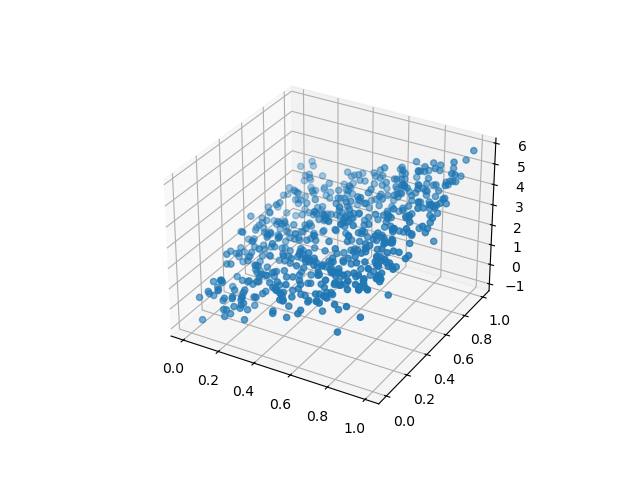

In [230]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
plt.show()

In [250]:
def plot_param_surface(wx_min,wx_max,wy_min,wy_max,obj_func):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(wx_min,wx_max,20)
    ys = np.linspace(wy_min,wy_max,20)
    
    wx,wy = np.meshgrid(xs,ys)
    w = np.vstack([wx.ravel(), wy.ravel()]).T

    wz = obj_func(w)

    ax.scatter(wx,wy,wz)
    
    ax.set_xlabel("w_1")
    ax.set_ylabel("w_2")
    ax.set_zlabel("L")
    return fig, ax

def overlay_trajectory(ax,obj_func,trajectory,label,color='k',lw=2):
    wxs=trajectory[:,0]
    wys=trajectory[:,1]
    wzs=obj_func(trajectory)
    
    ax.plot(wxs,wys,wzs, color, label=label)

    return ax

In [265]:
# Ordinary Linear
# Ridge

def least_squares(w):
    return np.linalg.norm((X @ w.T) - y, axis=0)**2

def ridge(w,l=900):
    return ( np.linalg.norm((X @ w.T) - y, axis=0)**2 + l*np.linalg.norm(w,axis=1)**2 )


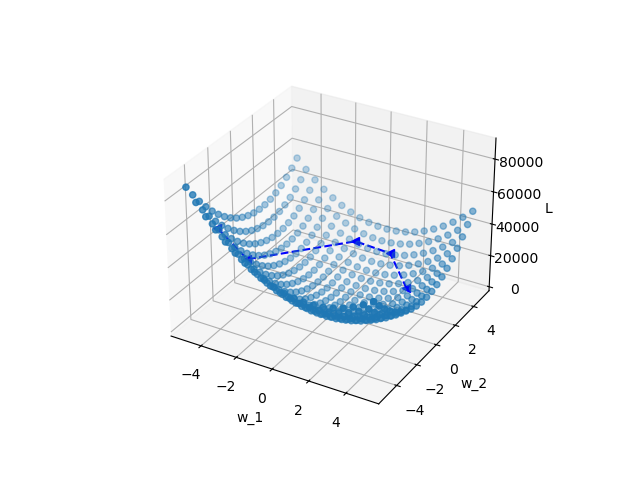

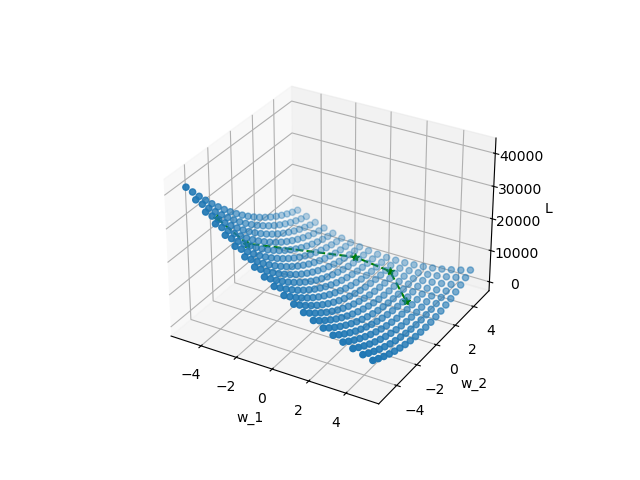

In [264]:
plt.close('all')
fig, LS = plot_param_surface(-5,5,-5,5,least_squares)
fig2, RR = plot_param_surface(-5,5,-5,5,ridge)
traj = np.array([[-4,-4],[-3,-3],[-1,4],[1,4],[3,2]])
overlay_trajectory(LS,least_squares,traj, "GD",'g--*', lw=0.5)
overlay_trajectory(RR,ridge,traj, "RR",'b--<', lw=0.5)

plt.show()

In [103]:
# GD
# GDM
# NAG
# SGD
# ADAM
# RMSPROP



# Analytic gradient descent algorithm.
# grad: Method that represents derivative of some function. 
def gd(grad, start, end, n=1000, eta=10**-4):
    path = np.zeros((n+1, len(start)))
    path[0] = start
    j = 1
    converged = np.allclose(path[j-1], end, atol=10**-2)
    while j < n and not converged: 
        path[j] = path[j-1] - eta * grad(path[j-1])
        j += 1
        converged = np.allclose(path[j-1], end, atol=10**-2)
    if converged: return path,j-1
    return path,n


# Gradient descent algorithm with finite difference derivatives.
# def gd(f, start, n=1000, eta=10**-4):

# Analytic gradient descent with momentum.
def gdm(grad, start, n=1000, eta=10**-4, gamma=0.9):
    path = np.empty((n+1, len(start)))
    path[0] = start
    j = 1
    converged = np.allclose(path[j-1], end, atol=10**-2)
    
    dw = eta * grad(path[0])
    path[1] = path[0] - dw
    for j in range(2,n+1):
        dw = eta * grad(path[j-1]) + gamma * dw
        path[j] = path[j-1] - dw
    return path




def NAG(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

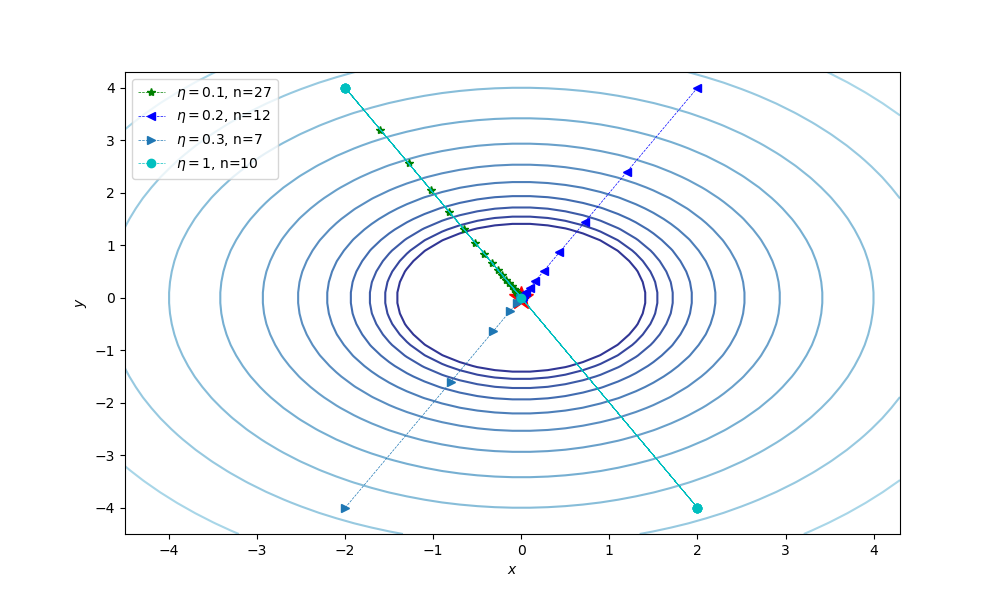

In [110]:
plt.close('all')

fig,ax = contour_minima_surface()

init1=[-2,4]
init2=[2,4]
init3=[-2,-4]
init4=[2,-4]

target = [0,0]

eta1=0.1
eta2=0.2
eta3=0.3
eta4=1

gd_1,n_1=gd(grad_minima_surface, init1, target, n=100, eta=eta1)
gd_2,n_2=gd(grad_minima_surface, init2, target, n=100, eta=eta2)
gd_3,n_3=gd(grad_minima_surface, init3, target, n=100, eta=eta3)
gd_4,n_4=gd(grad_minima_surface, init4, target, n=10, eta=eta4)

overlay_trajectory_contour(ax,gd_1,f'$\\eta=${eta1}, n={n_1}','g--*', lw=0.5)
overlay_trajectory_contour(ax,gd_2,f'$\\eta=${eta2}, n={n_2}','b--<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,f'$\\eta=${eta3}, n={n_3}','-->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,f'$\\eta=${eta4}, n={n_4}','c--o', lw=0.5)
plt.legend(loc=2)
plt.show()